# Applying to the Data Modeler role at EZ-AD

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Librarries

In [ ]:
import numpy as np
import pandas as pd
#Visualization
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
#Hot Encoding Technique
from sklearn.preprocessing import OneHotEncoder
#Feature Scaling
from sklearn.preprocessing import StandardScaler
#Decission Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#Evaluate Performance of the Model using Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
#PCA
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
#ANOVA / Chi square
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Loading Dataset and Exploration of the Dataset

In [ ]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/drive/MyDrive/machinelearning/Uzair_work/Assignment_1_task_1/bank-additional.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
print("Number of Observations : ", df.shape[0])
print("Number of Columns : ", df.shape[1])

Number of Observations :  41188
Number of Columns :  21


In [ ]:
counts = df['y'].value_counts()
print(counts)


no     36548
yes     4640
Name: y, dtype: int64


In [ ]:
print(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


To checkt the Missing Values in the Dataset

In [ ]:
missing_values = df.isna().sum()
print(missing_values)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


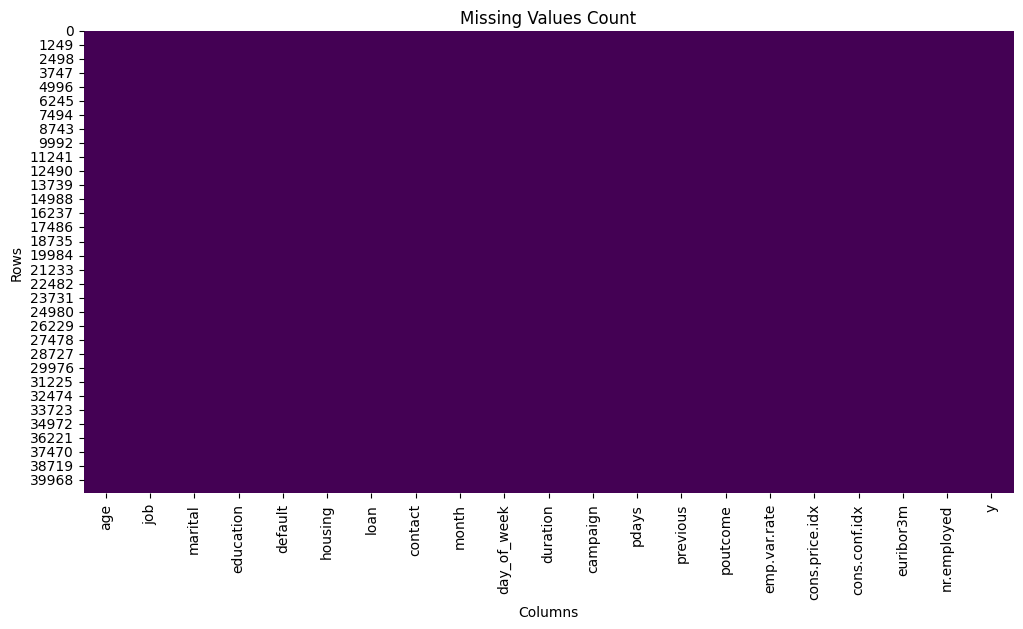

In [ ]:
# plt.figure(figsize=(10,6))
# sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False, cbar=False)
# plt.title('Missing Values Heatmap')
# plt.show()
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Count')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [ ]:
col_names = df.columns.tolist()
print(col_names)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


Select the categorical columns

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print('Categorical columns:', categorical_cols)

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


The Descriptive statistics function of the python pandas is not applicable on the object dataType that is why i am only selecting the Numeric values for this

In [ ]:
Number_cols = []
for i in col_names:
    if i not in categorical_cols:
        Number_cols.append(i)

print('Numerical columns:', Number_cols)

Numerical columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [ ]:
print(len(Number_cols))

10


In [ ]:

df[Number_cols].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**visualize the distribution of age across different outcomes:**

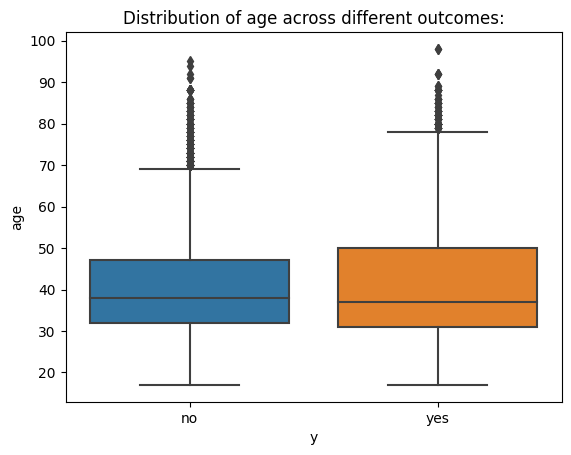

In [ ]:
sns.boxplot(x='y', y='age', data=df)
plt.title("Distribution of age across different outcomes:")
plt.show()

# Preprocssing the Data

**Hot Encoding Technique to the Categorical Variables**


Selecting the categorical columns

In [ ]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
df_categorical = df[categorical_cols]

In [ ]:
df_categorical.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


**visualize the count of different jobs:**

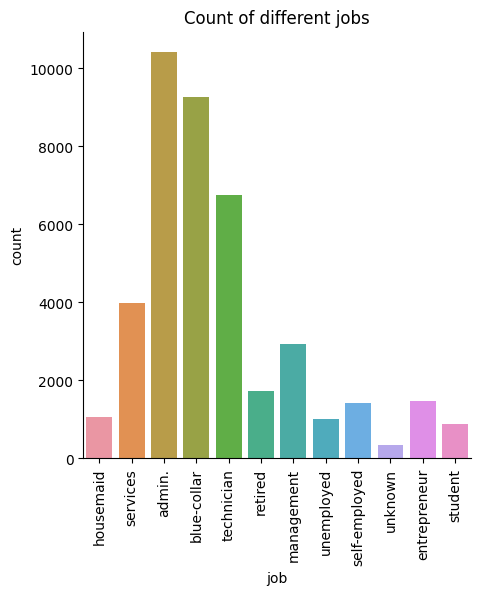

In [ ]:

sns.catplot(x='job', kind='count', data=df_categorical)
plt.xticks(rotation=90)
plt.title("Count of different jobs")
plt.show()

**visualize the count of different Marital Status:**

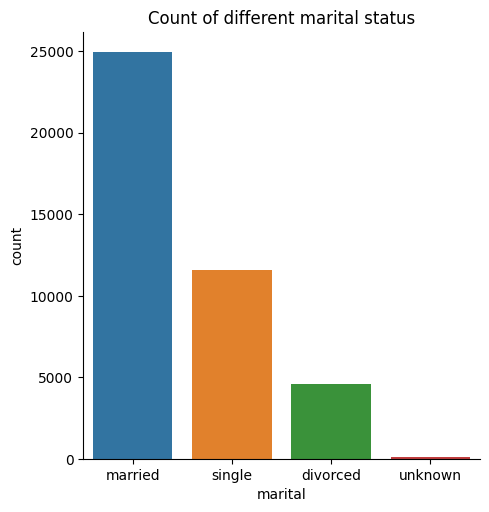

In [ ]:
sns.catplot(x='marital', kind='count', data=df_categorical)
# plt.xticks(rotation=90)
plt.title("Count of different marital status")
plt.show()

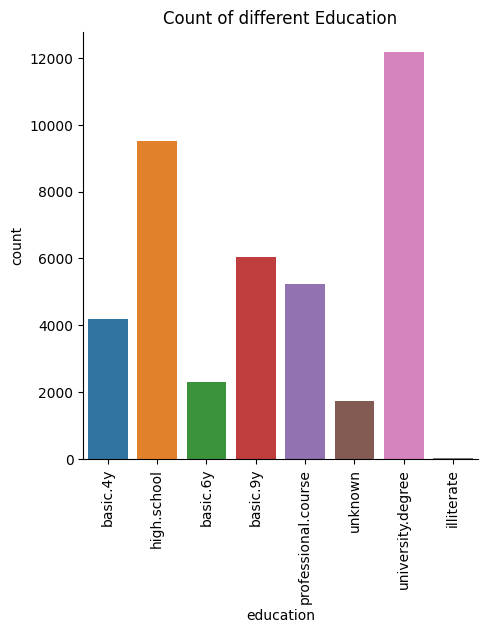

In [ ]:
sns.catplot(x='education', kind='count', data=df_categorical)
plt.xticks(rotation=90)
plt.title("Count of different Education")
plt.show()

In [ ]:
df.shape

(41188, 21)

<ipython-input-23-09b10b06b1ce>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


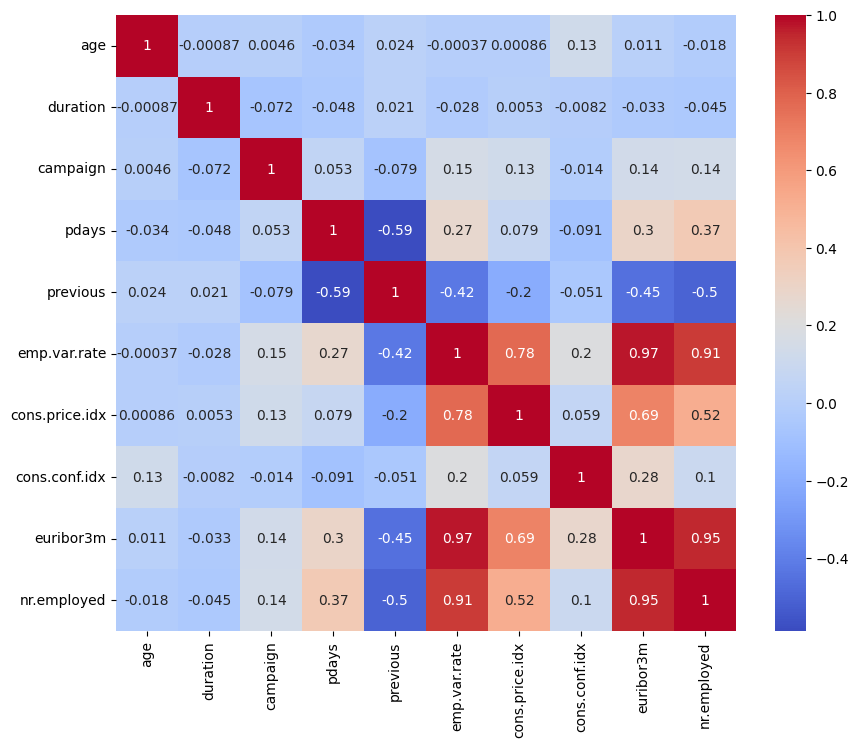

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

# display the plot
plt.show()

Applying the One-hot encode the categorical columns

In [ ]:
df_encoded = pd.get_dummies(df_categorical, columns=categorical_cols)

Now after Getting this I am combining the Combine the encoded categorical columns with the numerical columns

In [ ]:
Number_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df_pre = pd.concat([df_encoded, df[Number_cols]], axis=1)

In [ ]:
df_pre.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
col_pre = df_pre.columns.tolist()
print(col_pre)

['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'age', 'duration', 'campaign', 'pdays', 'previous', 

In [ ]:
print(len(col_pre))

63


**Feature Scaling on the Numeric Columns**

In [ ]:
scaler = StandardScaler()
df_pre[Number_cols] = scaler.fit_transform(df_pre[Number_cols])

In [ ]:
df_pre.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168


Experiment:

In [ ]:
X = df_pre
y = df['y']

Concatenating the X_num and the X_cat

In [ ]:
# X = np.concatenate([X_cat.toarray(), X_num], axis=1)

Now I am spliting the dataset into training and testing, setting the test size is 20%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Now, Defining the decision tree classifier, creating the object of the DecissionTreeClaassifier

In [ ]:
clf = DecisionTreeClassifier(max_depth=5, criterion='entropy')

Train the decision tree classifier on X_train and y_train

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

Predict test set

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the decision tree classifier: {:.2f}%".format(accuracy * 100))

Accuracy of the decision tree classifier: 91.38%


Print the Confusion Matirx to check the Performance of the Model

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10622   346]
 [  719   670]]
              precision    recall  f1-score   support

          no       0.94      0.97      0.95     10968
         yes       0.66      0.48      0.56      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.73      0.75     12357
weighted avg       0.91      0.91      0.91     12357



In [ ]:
corr_threshold = 0.6
corr_matrix = df_pre.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
high_corr_cols = [column for column in upper.columns if any(upper[column] > corr_threshold)]
df_high_corr = df_pre[high_corr_cols]

<ipython-input-39-580fbaaeaf3b>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [ ]:
df_high_corr

,marital_single,default_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,poutcome_nonexistent,pdays,previous,cons.price.idx,euribor3m,nr.employed
0,0,0,0,0,0,1,1,0.195414,-0.349494,0.722722,0.712460,0.331680
1,0,1,0,0,0,1,1,0.195414,-0.349494,0.722722,0.712460,0.331680
2,0,0,1,0,0,1,1,0.195414,-0.349494,0.722722,0.712460,0.331680
3,0,0,0,0,0,1,1,0.195414,-0.349494,0.722722,0.712460,0.331680
4,0,0,0,0,1,1,1,0.195414,-0.349494,0.722722,0.712460,0.331680
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,1,0,0,0,1,0.195414,-0.349494,2.058168,-1.495186,-2.815697
41184,0,0,0,0,0,0,1,0.195414,-0.349494,2.058168,-1.495186,-2.815697
41185,0,0,1,0,0,0,1,0.195414,-0.349494,2.058168,-1.495186,-2.815697
41186,0,0,0,0,0,0,1,0.195414,-0.349494,2.058168,-1.495186,-2.815697


In [ ]:
X_hc = df_high_corr
y_hc = y


X_train_hc, X_test_hc, y_train_hc, y_test_hc = train_test_split(X_hc, y_hc, test_size=0.2, random_state=42)



clf = DecisionTreeClassifier(max_depth=5, criterion='entropy')
clf.fit(X_train_hc, y_train_hc)

# Predict test set
y_pred_hc = clf.predict(X_test_hc)

In [ ]:
accuracy_hc = accuracy_score(y_test_hc, y_pred_hc)
print("Accuracy of the decision tree classifier After Hiighly Correlated : {:.2f}%".format(accuracy_hc * 100))

Accuracy of the decision tree classifier After Hiighly Correlated : 89.65%


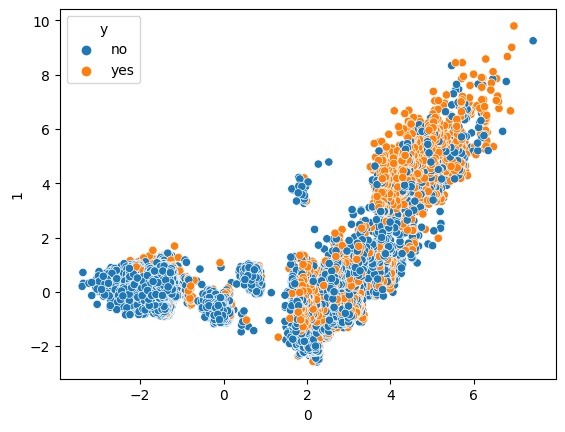

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.concat([pd.DataFrame(X_pca), y], axis=1)
sns.scatterplot(data=df_pca, x=0, y=1, hue='y')
plt.show()

In [ ]:
df_pca.head()

,0,1,y
0,-1.409688,1.047868,no
1,-1.501583,1.040032,no
2,-1.362196,0.433598,no
3,-1.401649,0.561555,no
4,-1.396417,0.993384,no


In [ ]:
#  Separate features and target variable
X_pca = df_pca.drop('y', axis=1)
y_pca = df_pca['y']

# Split the data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

# Create an instance of the DecisionTreeClassifier
clf_pca = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
clf_pca.fit(X_train_pca, y_train_pca)

# Evaluate the model on the testing data
accuracy_pca = clf_pca.score(X_test_pca, y_test_pca)
print("Accuracy of the Decission tree after PCA :", accuracy_pca*100)

Accuracy of the Decission tree after PCA : 84.36513716921583


In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df_pre.columns.tolist()

['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success',


In [ ]:
scaler_MinMax = MinMaxScaler()
X_scaled = scaler_MinMax.fit_transform(X)
kbest = SelectKBest(chi2, k=30)
X_new = kbest.fit_transform(X_scaled, y)
selected_features = X.columns[kbest.get_support()]
print(selected_features)

Index(['job_admin.', 'job_blue-collar', 'job_retired', 'job_services',
       'job_student', 'marital_married', 'marital_single',
       'education_basic.9y', 'education_university.degree', 'default_no',
       'default_unknown', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_dec', 'month_jul', 'month_mar', 'month_may', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'duration', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [ ]:
X_sf = df_pre[selected_features]
y_sf = y
X_train_sf, X_test_sf, y_train_sf, y_test_sf = train_test_split(X_sf, y_sf, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train_sf, y_train_sf)

accuracy = dt_classifier.score(X_test_sf, y_test_sf)

print("Accuracy After Applying ANOVA Technique for Feature Selection : {:.2f}%".format(accuracy * 100))

Accuracy After Applying ANOVA Technique for Feature Selection : 88.91%


In [ ]:

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rfc.fit(X_train_rf, y_train_rf)

# Test the classifier on the testing data and print accuracy score
accuracy = rfc.score(X_test_rf, y_test_rf)
print("Accuracy of the Random Forest : {:.2f}%".format(accuracy * 100))

Accuracy of the Random Forest : 91.11%
